In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv("/content/air quality dataset.csv")

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.shape

(29531, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [7]:
df[df.duplicated()]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket


#  DATA CLEANING AND PREPROCESSING**

Drop rows where the target variable (AQI) is missing

In [14]:
df=df.dropna(subset=["AQI"],ignore_index=True)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
24846,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
24847,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
24848,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [12]:
df[df["AQI"].isnull()]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29374,Visakhapatnam,2020-01-27,59.32,117.45,3.11,19.17,12.72,11.62,0.92,8.35,29.25,3.13,7.13,1.00,NaN,NaN
29400,Visakhapatnam,2020-02-22,31.82,70.91,2.34,23.92,14.56,12.41,0.58,7.58,26.08,2.59,5.82,1.15,NaN,NaN
29409,Visakhapatnam,2020-03-02,52.80,104.45,3.24,43.27,24.56,17.49,1.24,9.08,17.61,4.44,9.25,2.75,NaN,NaN
29463,Visakhapatnam,2020-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,18109
PM10,11140
NH3,10328
Toluene,8041
Benzene,5623
AQI,4681
AQI_Bucket,4681
PM2.5,4598
NOx,4185
O3,4022


Convert date column to datetime format


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

 categorize the AQI_Bucket column

In [11]:
df['AQI_Bucket'] = df['AQI_Bucket'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

# DATA ANALYSIS

In [15]:
# percentage of null values

percentage_null_values=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
percentage_null_values

,0
Xylene,61.859155
PM10,28.515091
NH3,26.301811
Toluene,23.444668
Benzene,14.225352
NOx,7.472837
O3,3.247485
PM2.5,2.728370
SO2,2.434608
CO,1.790744


xylene has the highest percentage of missing values

# **DATE**

conclusions drawn:
1. date column is object type(need to be converted into datetime format)



In [ ]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,100.21,6.93,28.71,33.72,19.7,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,100.21,13.85,28.68,41.08,19.7,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,100.21,24.39,32.66,52.61,19.7,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,100.21,43.48,42.08,84.57,19.7,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,100.21,54.56,35.31,72.80,19.7,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


In [ ]:
df.shape

(20408, 16)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20408 entries, 0 to 20407
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
20408 non-null  object
dtypes: object(1)
memory usage: 159.6+ KB


In [ ]:
df["Date"].isnull().sum()

0

# **AQI_Bucket**



In [ ]:
df["AQI_Bucket"].isnull().sum()

0

In [ ]:
df["AQI_Bucket"].value_counts()


,count
AQI_Bucket,
Moderate,7263
Satisfactory,6604
Poor,2401
Very Poor,1923
Severe,1184
Good,1033


<Axes: ylabel='count'>

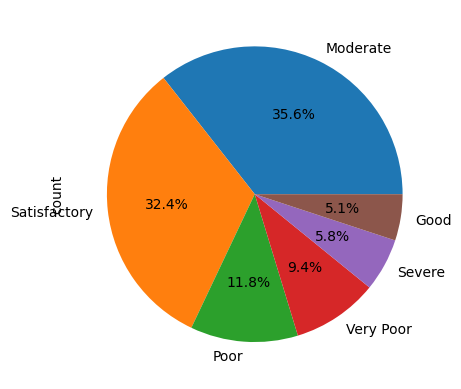

In [ ]:
df["AQI_Bucket"].value_counts().plot(kind="pie",autopct="%0.1f%%")

# **PM2.5**

conclusion:
1 highly positive skewed
2. so many outliers present

In [ ]:
df["PM2.5"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29531 entries, 0 to 29530
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
24933 non-null  float64
dtypes: float64(1)
memory usage: 230.8 KB


In [ ]:
df["PM2.5"].describe()

,PM2.5
count,24933.000000
mean,67.450578
std,64.661449
min,0.040000
25%,28.820000
50%,48.570000
75%,80.590000
max,949.990000


<Axes: ylabel='Frequency'>

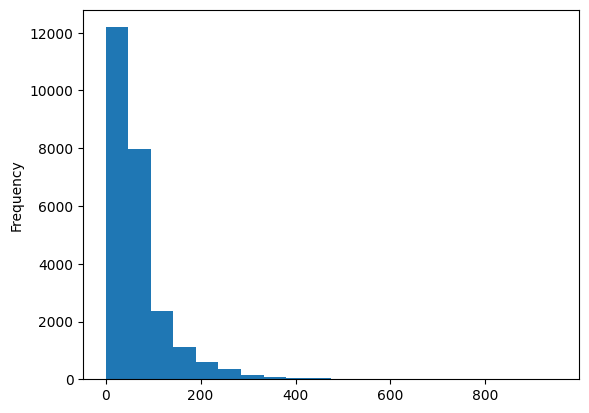

In [ ]:
df['PM2.5'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

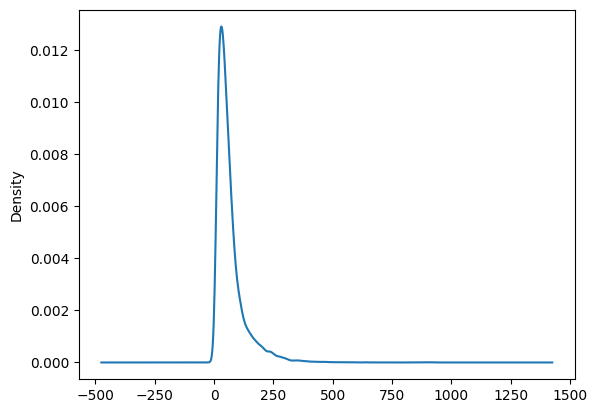

In [ ]:
df['PM2.5'].plot(kind='kde')

In [ ]:
df["PM2.5"].skew()

3.3699598508656305

<Axes: >

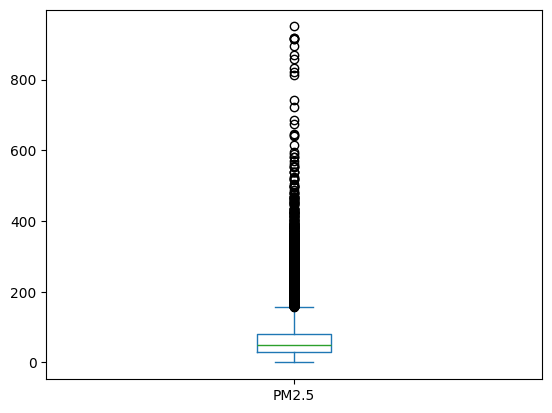

In [ ]:
df['PM2.5'].plot(kind='box')

In [ ]:
df.head(1)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.0,0.02,0.0,NaN,NaN


# City

In [ ]:
df["City"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29531 entries, 0 to 29530
Series name: City
Non-Null Count  Dtype 
--------------  ----- 
29531 non-null  object
dtypes: object(1)
memory usage: 230.8+ KB


<Axes: ylabel='count'>

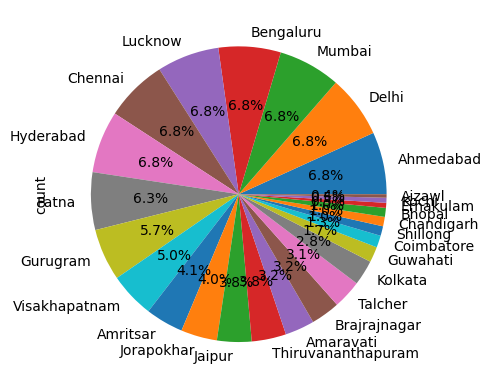

In [ ]:
df["City"].value_counts().plot(kind="pie",autopct="%0.1f%%")